**COVID-19 Data Tracker**

- Download a COVID-19 dataset (cases, deaths, recovered).
- Clean it using Pandas (handle missing values, filter by country).
- Use NumPy to calculate growth rates and doubling time.
- Plot: line plot of cases over time, bar plot of top 10 affected countries.


In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [133]:
df_worldmeter = pd.read_csv("../data/covid-19/worldometer_data.csv")
df_worldmeter.fillna({
    'NewCases' : 0,
    "NewRecovered" : 0,
    'NewDeaths' : 0
},inplace=True)


In [134]:
full_gropued = pd.read_csv("../data/covid-19/full_grouped.csv")
full_gropued["Date"] = pd.to_datetime(full_gropued["Date"])
full_gropued.info()
usa = full_gropued[full_gropued['Country/Region'] =="US" ]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35156 entries, 0 to 35155
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            35156 non-null  datetime64[ns]
 1   Country/Region  35156 non-null  object        
 2   Confirmed       35156 non-null  int64         
 3   Deaths          35156 non-null  int64         
 4   Recovered       35156 non-null  int64         
 5   Active          35156 non-null  int64         
 6   New cases       35156 non-null  int64         
 7   New deaths      35156 non-null  int64         
 8   New recovered   35156 non-null  int64         
 9   WHO Region      35156 non-null  object        
dtypes: datetime64[ns](1), int64(7), object(2)
memory usage: 2.7+ MB


In [135]:
active_cases = np.array(usa['Active'])

# Avoid division by zero by masking
valid = active_cases[:-1] > 0  
growth_rate = np.zeros_like(active_cases[1:], dtype=float)
growth_rate[valid] = (active_cases[1:][valid] - active_cases[:-1][valid]) / active_cases[:-1][valid]

# Doubling time only for positive growth
with np.errstate(divide='ignore', invalid='ignore'):
    doubling_time = np.log(2) / np.log(1 + growth_rate)

# Replace inf/nan with NaN for clarity
doubling_time = np.where(np.isfinite(doubling_time), doubling_time, np.nan)


In [136]:
full_gropued.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35156 entries, 0 to 35155
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            35156 non-null  datetime64[ns]
 1   Country/Region  35156 non-null  object        
 2   Confirmed       35156 non-null  int64         
 3   Deaths          35156 non-null  int64         
 4   Recovered       35156 non-null  int64         
 5   Active          35156 non-null  int64         
 6   New cases       35156 non-null  int64         
 7   New deaths      35156 non-null  int64         
 8   New recovered   35156 non-null  int64         
 9   WHO Region      35156 non-null  object        
dtypes: datetime64[ns](1), int64(7), object(2)
memory usage: 2.7+ MB


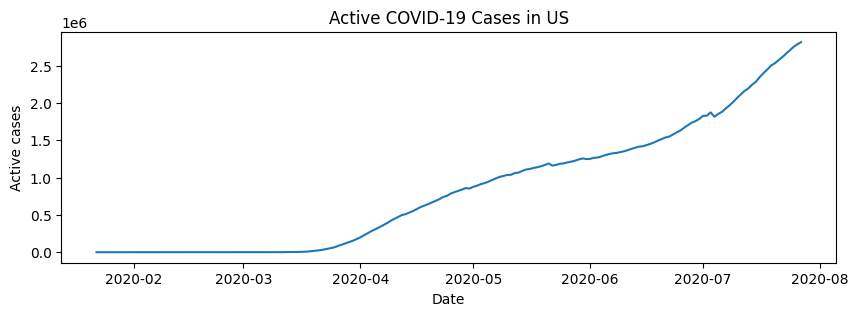

In [137]:
plt.figure(figsize=(10,3))
usa_sorted = usa.sort_values(by="Date")
plt.plot(usa_sorted.Date, usa_sorted.Active)  
plt.xlabel("Date")
plt.ylabel("Active cases")
plt.title("Active COVID-19 Cases in US")
plt.show()

 

In [138]:
country_wise = pd.read_csv("../data/covid-19/country_wise_latest.csv")
top_countries = country_wise.sort_values(by="Active",ascending=False).reset_index().head(10)

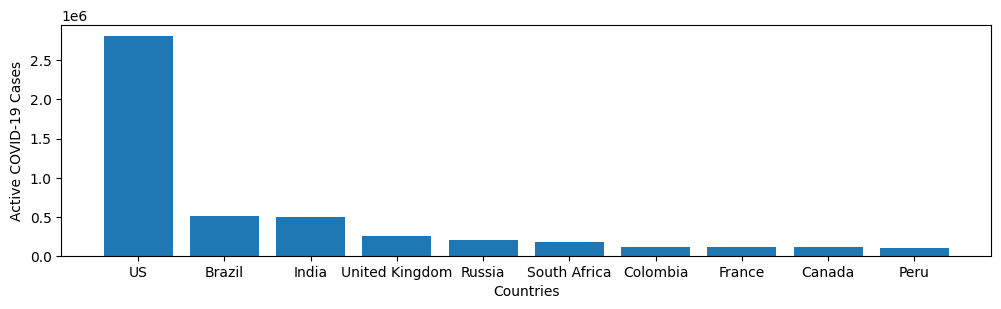

In [139]:
plt.figure(figsize=(12,3))
plt.bar( top_countries["Country/Region"],top_countries.Active)
plt.xlabel("Countries")
plt.ylabel("Active COVID-19 Cases")
plt.show()